In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
im_train = train_images / 255.0
im_test = test_images / 255.0

In [3]:
im_train = im_train.reshape(im_train.shape[0], 28, 28, 1)
im_test = im_test.reshape(im_test.shape[0], 28, 28, 1)
lbl_train = to_categorical(train_labels, 10)
lbl_test = to_categorical(test_labels, 10)

In [4]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
start_cnn = time.time()
history_cnn = cnn_model.fit(im_train, lbl_train, epochs=30, batch_size=64,
                    validation_data=(im_test, lbl_test))
cnn_time = time.time() - start_cnn

Epoch 1/30


938/938 [==============================] - 15s 14ms/step - loss: 0.2442 - accuracy: 0.9255 - val_loss: 0.0547 - val_accuracy: 0.9825
Epoch 2/30
938/938 [==============================] - 10s 10ms/step - loss: 0.0856 - accuracy: 0.9746 - val_loss: 0.0350 - val_accuracy: 0.9881
Epoch 3/30
938/938 [==============================] - 10s 11ms/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0288 - val_accuracy: 0.9898
Epoch 4/30
938/938 [==============================] - 10s 11ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 5/30
938/938 [==============================] - 10s 10ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0285 - val_accuracy: 0.9905
Epoch 6/30
938/938 [==============================] - 10s 11ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 7/30
938/938 [==============================] - 10s 10ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0244 - val_accurac

In [7]:
lstm_model = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [9]:
start_lstm = time.time()
history_lstm = lstm_model.fit(im_train, lbl_train,
                              epochs=30, batch_size=64,
                              validation_data=(im_test, lbl_test),
                              verbose=1)
lstm_time = time.time() - start_lstm

Epoch 1/30
938/938 [==============================] - 23s 22ms/step - loss: 0.6608 - accuracy: 0.7897 - val_loss: 0.1823 - val_accuracy: 0.9449
Epoch 2/30
938/938 [==============================] - 19s 20ms/step - loss: 0.2161 - accuracy: 0.9459 - val_loss: 0.1106 - val_accuracy: 0.9682
Epoch 3/30
938/938 [==============================] - 19s 20ms/step - loss: 0.1502 - accuracy: 0.9639 - val_loss: 0.1049 - val_accuracy: 0.9708
Epoch 4/30
938/938 [==============================] - 18s 19ms/step - loss: 0.1175 - accuracy: 0.9717 - val_loss: 0.0809 - val_accuracy: 0.9792
Epoch 5/30
938/938 [==============================] - 18s 19ms/step - loss: 0.0980 - accuracy: 0.9764 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 6/30
938/938 [==============================] - 18s 19ms/step - loss: 0.0831 - accuracy: 0.9804 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 7/30
938/938 [==============================] - 18s 19ms/step - loss: 0.0754 - accuracy: 0.9822 - val_loss: 0.0578 - val_accuracy:

In [ ]:
epochs = [10, 20, 30]

accuracy_data = {
    'Epoch': epochs,
    'CNN Train Accuracy': [history_cnn.history['accuracy'][e-1] for e in epochs],
    'CNN Val Accuracy': [history_cnn.history['val_accuracy'][e-1] for e in epochs],
    'LSTM Train Accuracy': [history_lstm.history['accuracy'][e-1] for e in epochs],
    'LSTM Val Accuracy': [history_lstm.history['val_accuracy'][e-1] for e in epochs],
}
accuracy_df = pd.DataFrame(accuracy_data)

loss_data = {
    'Epoch': epochs,
    'CNN Train Loss': [history_cnn.history['loss'][e-1] for e in epochs],
    'CNN Val Loss': [history_cnn.history['val_loss'][e-1] for e in epochs],
    'LSTM Train Loss': [history_lstm.history['loss'][e-1] for e in epochs],
    'LSTM Val Loss': [history_lstm.history['val_loss'][e-1] for e in epochs],
}
loss_df = pd.DataFrame(loss_data)

print("\nModel Accuracy Comparison:\n")
print(accuracy_df)
print("\nModel Loss Comparison:\n")
print(loss_df)

print("\nTraining Time (s):")
print(pd.DataFrame({
    'Model': ['CNN', 'LSTM'],
    'Training Time(s)': [cnn_time, lstm_time]
}))



Model Accuracy Comparison:

   Epoch  CNN Train Accuracy  CNN Val Accuracy  LSTM Train Accuracy  \
0     10            0.993317            0.9926             0.987200   
1     20            0.996233            0.9931             0.992850   
2     30            0.997550            0.9930             0.995433   

   LSTM Val Accuracy  
0             0.9835  
1             0.9887  
2             0.9905  

Model Loss Comparison:

   Epoch  CNN Train Loss  CNN Val Loss  LSTM Train Loss  LSTM Val Loss
0     10        0.021849      0.025828         0.054604       0.066278
1     20        0.011048      0.026442         0.026984       0.052981
2     30        0.007847      0.035075         0.018266       0.044052

Training Time (s):
  Model  Training Time(s)
0   CNN        316.656794
1  LSTM        602.868776


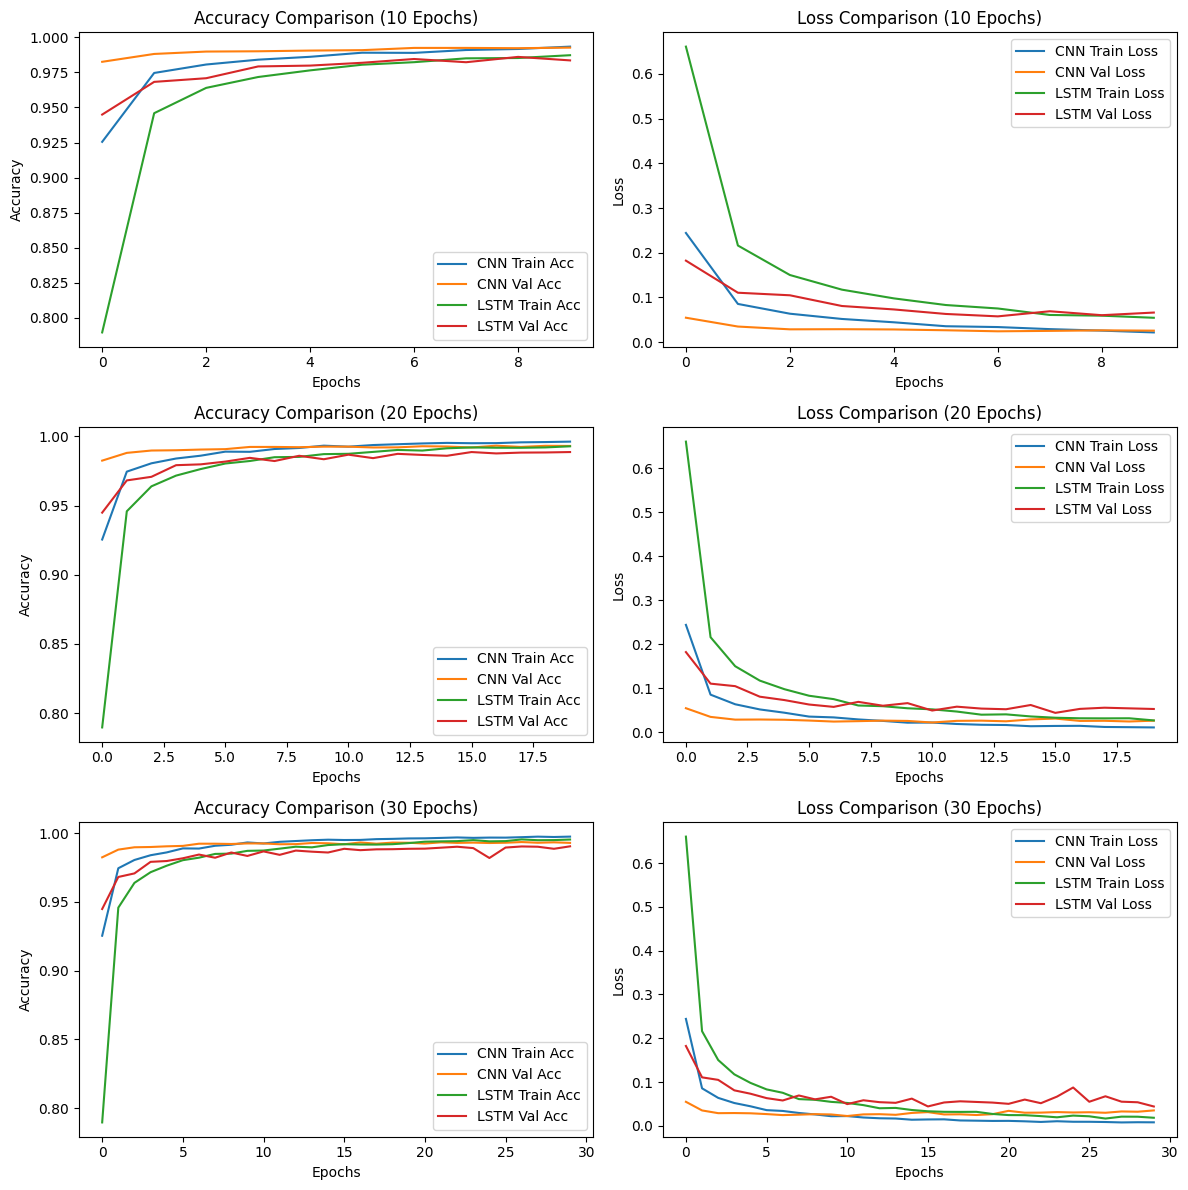

In [11]:
epoch_sets = [10, 20, 30]
plt.figure(figsize=(12, 12)) 

for i, epochs in enumerate(epoch_sets, 1):
    plt.subplot(3, 2, (i - 1) * 2 + 1)
    plt.plot(history_cnn.history['accuracy'][:epochs], label='CNN Train Acc')
    plt.plot(history_cnn.history['val_accuracy'][:epochs], label='CNN Val Acc')
    plt.plot(history_lstm.history['accuracy'][:epochs], label='LSTM Train Acc')
    plt.plot(history_lstm.history['val_accuracy'][:epochs], label='LSTM Val Acc')
    plt.title(f'Accuracy Comparison ({epochs} Epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, (i - 1) * 2 + 2)
    plt.plot(history_cnn.history['loss'][:epochs], label='CNN Train Loss')
    plt.plot(history_cnn.history['val_loss'][:epochs], label='CNN Val Loss')
    plt.plot(history_lstm.history['loss'][:epochs], label='LSTM Train Loss')
    plt.plot(history_lstm.history['val_loss'][:epochs], label='LSTM Val Loss')
    plt.title(f'Loss Comparison ({epochs} Epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()